# TidyTuesday week 7 Valentine's Day consumer data

In [22]:
import numpy as np
import pandas as pd

In [23]:
# load datasets directly from github
gifts_age = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/gifts_age.csv')

In [25]:
# initial data inspection
#print(gifts_age.head())
#print(gifts_age.info())

     Age  SpendingCelebrating  Candy  Flowers  Jewelry  GreetingCards  \
5    65+                   13     42       25        8             44   
4  55-64                   18     50       32       13             43   
3  45-54                   19     60       37       20             42   
2  35-44                   31     58       41       29             42   
1  25-34                   40     62       44       34             33   
0  18-24                   51     70       50       33             33   

   EveningOut  Clothing  GiftCards  
5          24        12         20  
4          29        19         20  
3          31        20         23  
2          30        26         22  
1          37        27         19  
0          41        33         23  


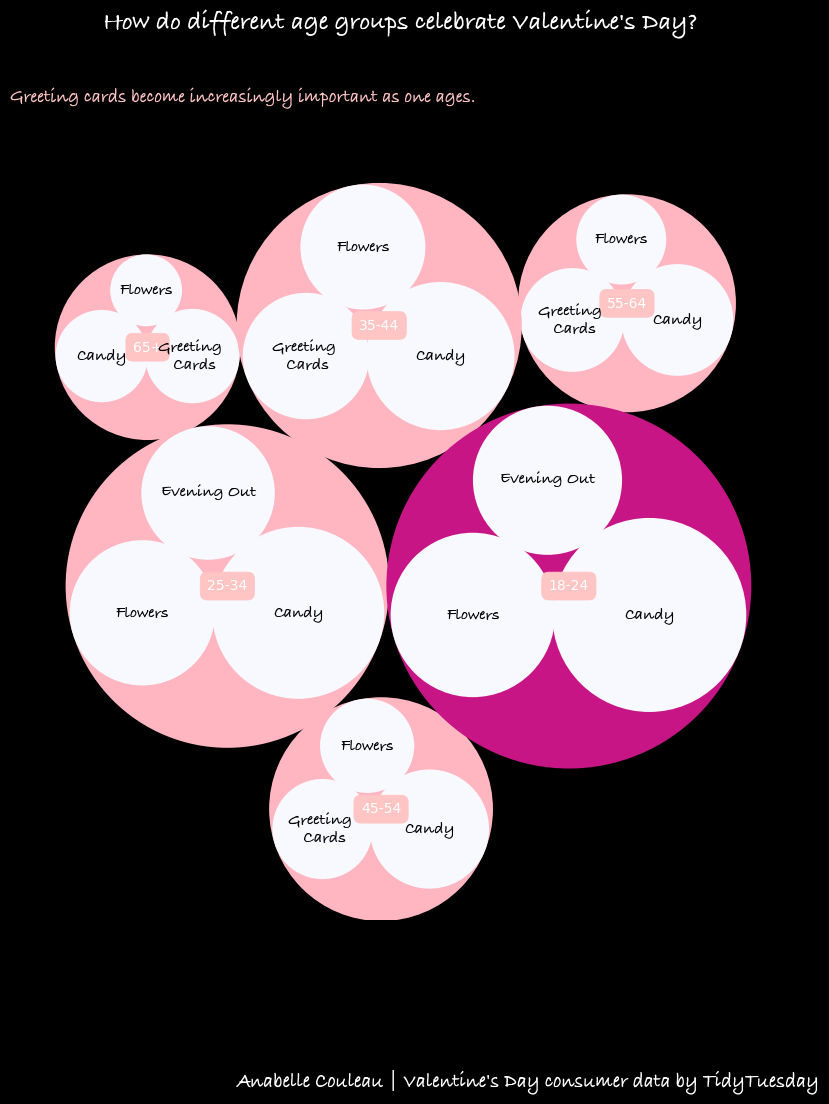

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import circlify

# Using a style
plt.style.use('dark_background')

gifts_age = gifts_age.sort_values('SpendingCelebrating')
print(gifts_age)
circles = circlify.circlify(gifts_age['SpendingCelebrating'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off')
ax.set_aspect('equal')  # show circles as circles, not as ellipses

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r, )
          for circle in circles)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# Plot the main circles for each age group
labels = gifts_age['Age'] 
colors = [ 'mediumvioletred' if val == gifts_age['SpendingCelebrating'].max() else 'lightpink' for val in gifts_age['SpendingCelebrating']]

for circle, label, color, row in zip(circles, labels, colors, range(6)):
    #print(circle)
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=2, color=color))
    ax.annotate(label, (x, y), va='center', ha='center', size=10, bbox=dict(facecolor='#ffc4c4', edgecolor='#ffc4c4', boxstyle='round', pad=.5))
    
    # Plot sub-circles for each other column
    values = gifts_age.iloc[row, 2:].tolist()
    labels_col= ['Candy','Flowers','Jewelry','Greeting \n Cards','Evening Out', 'Clothing','Gift Cards']
    df = pd.DataFrame({'labels_col': labels_col, 'values': values})
    df = df.sort_values('values', ascending=False)
    df = df.reset_index(drop=True)
    df = df.iloc[:3,]   #  select the top 3 for each age group
    vals = df['values'].tolist()
    labs = df['labels_col'].tolist()

    sub_circles = circlify.circlify(df['values'].tolist(), show_enclosure=False, target_enclosure=circle)
    
    for circle2, value, lab in zip(sub_circles, vals , labs[::-1]):
        x, y, r = circle2
        ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=2, color='ghostwhite'))
        ax.annotate(f'{lab}', (x, y), va='center', ha='center', size=12, color='black', weight='bold', fontname='Bradley Hand')

#Plot subtitle
plt.suptitle('How do different age groups celebrate Valentine\'s Day?', fontname='Bradley Hand', fontsize=18, color='white')

#Plot title
plt.title("Greeting cards become increasingly important as one ages.", loc='left', fontname='Bradley Hand', fontsize=13, color='#ffc4c4', weight='bold')

# Add a footnote below and to the right side of the chart
ax.tick_params(labelsize = 14)
ax.annotate('Anabelle Couleau | Valentine\'s Day consumer data by TidyTuesday',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=14, fontname='Bradley Hand')
#fig.tight_layout()
plt.show()
